## Amazon Book Reviews Part III: Review Text Length

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

Length of review texts are calculated using bigQuery and imported into pandas dataframe. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [3]:
query1 = "SELECT unixReviewTime, wordLength FROM amazon_book_small.word_length \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2008-01-01 00:00:00 UTC'"

In [4]:
project_id = 'dotted-chiller-156222'

In [5]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 18.0% done. Elapsed 8.44 s.
  Got page: 3; 26.0% done. Elapsed 12.43 s.
  Got page: 4; 35.0% done. Elapsed 16.45 s.
  Got page: 5; 44.0% done. Elapsed 20.41 s.
  Got page: 6; 53.0% done. Elapsed 24.42 s.
  Got page: 7; 62.0% done. Elapsed 28.44 s.
  Got page: 8; 70.0% done. Elapsed 32.6 s.
  Got page: 9; 79.0% done. Elapsed 37.18 s.
  Got page: 10; 88.0% done. Elapsed 42.34 s.
  Got page: 11; 97.0% done. Elapsed 46.55 s.
  Got page: 12; 100.0% done. Elapsed 47.96 s.
Got 1135224 rows.

Total time taken 63.31 s.
Finished at 2017-01-24 16:28:18.


In [6]:
da.head(1)

,unixReviewTime,wordLength
0,2001-09-20,81


In [7]:
da.tail(1)

,unixReviewTime,wordLength
1135223,2003-06-14,230


In [8]:
da.set_index(da.unixReviewTime, inplace = True)

In [9]:
dh = da.sort_index()

### Number of reviews 1996-2007

In [78]:
dp = dh.groupby(dh.unixReviewTime.dt.year).size()

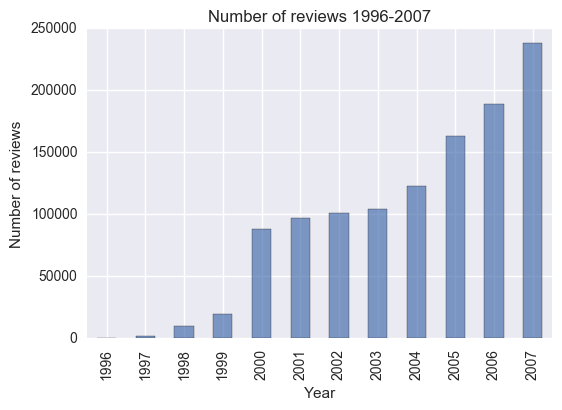

In [73]:
dp.plot(kind = 'bar', alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews 1996-2007')

### Number of reviews 2007-2014

In [11]:
query2 = "SELECT unixReviewTime, wordLength FROM amazon_book_small.word_length \
WHERE unixReviewTime >= '2008-01-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC'"

In [12]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.19 s. Waiting...
  Elapsed 21.83 s. Waiting...
Query done.
Processed: 135.8 Mb

Retrieving results...
  Got page: 1; 1.0% done. Elapsed 29.11 s.
  Got page: 2; 3.0% done. Elapsed 33.18 s.
  Got page: 3; 4.0% done. Elapsed 37.35 s.
  Got page: 4; 5.0% done. Elapsed 40.98 s.
  Got page: 5; 6.0% done. Elapsed 44.73 s.
  Got page: 6; 8.0% done. Elapsed 48.13 s.
  Got page: 7; 9.0% done. Elapsed 52.1 s.
  Got page: 8; 10.0% done. Elapsed 56.93 s.
  Got page: 9; 12.0% done. Elapsed 61.05 s.
  Got page: 10; 13.0% done. Elapsed 65.15 s.
  Got page: 11; 14.0% done. Elapsed 69.12 s.
  Got page: 12; 15.0% done. Elapsed 73.11 s.
  Got page: 13; 17.0% done. Elapsed 77.61 s.
  Got page: 14; 18.0% done. Elapsed 81.93 s.
  Got page: 15; 19.0% done. Elapsed 85.41 s.
  Got page: 16; 21.0% done. Elapsed 90.77 s.
  Got page: 17; 22.0% done. Elapsed 95.63 s.
  Got page: 18; 23.0% done. Elapsed 99.54 s.
  Got page: 19; 24.0% done. Elapsed 102.82 s.
  Got

In [16]:
db.set_index(db.unixReviewTime, inplace = True)

In [17]:
di = db.sort_index()

,unixReviewTime,wordLength
unixReviewTime,,
2008-01-02,2008-01-02,547
2008-01-02,2008-01-02,17
2008-01-02,2008-01-02,491
2008-01-02,2008-01-02,430
2008-01-02,2008-01-02,165


In [53]:
df = pd.concat([dh, di])
df = df.sort_index()

In [74]:
dz = di.groupby(di.unixReviewTime.dt.year).size()

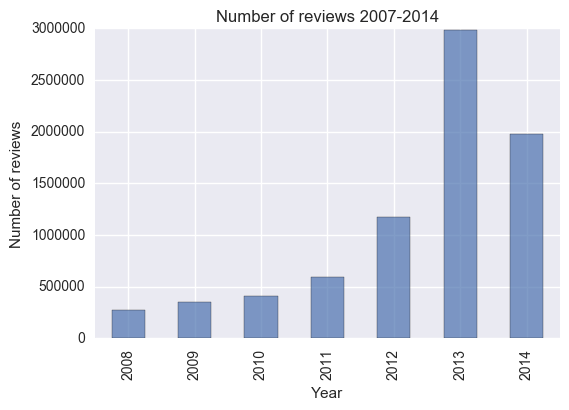

In [75]:
dz.plot(kind = 'bar', alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews 2007-2014')

In [76]:
dy = df.groupby(df.unixReviewTime.dt.year).size()

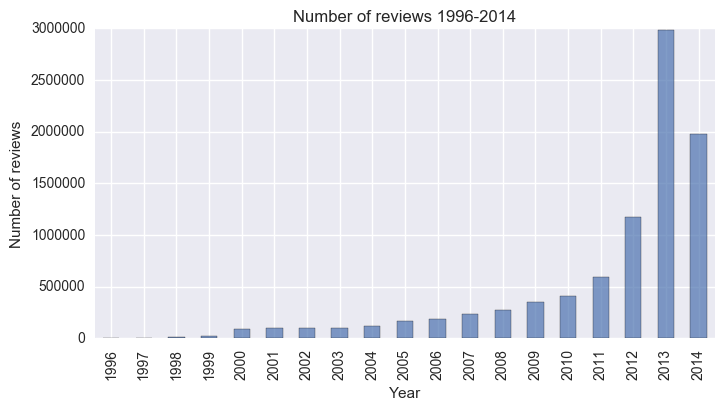

In [117]:
dy.plot(kind = 'bar', alpha = 0.7, figsize = [8, 4])
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews 1996-2014')

### Mean text length 

In [106]:
a = dh.groupby(dh.unixReviewTime.dt.year) # average length of reviews per year.
b = a['wordLength'].mean()
b, b.mean()

(unixReviewTime
 1996    170.120000
 1997    132.372856
 1998    132.606515
 1999    142.115664
 2000    186.921461
 2001    202.879703
 2002    211.834383
 2003    220.743542
 2004    230.233209
 2005    226.133145
 2006    218.002731
 2007    195.578374
 Name: wordLength, dtype: float64, 189.12846531998943)

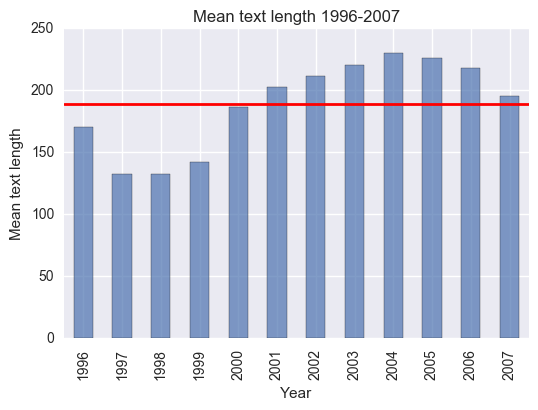

In [105]:
a = dh.groupby(dh.unixReviewTime.dt.year) # average length of reviews per year.
a['wordLength'].mean().plot(kind = 'bar', alpha =0.7)
plt.ylabel('Mean text length')
plt.xlabel('Year')
plt.axhline(y= 189.0, linewidth=2, color='r')
plt.title('Mean text length 1996-2007')

** The red line represents mean of means of review text length from 1996-2007.**

In [107]:
b = di.groupby(di.unixReviewTime.dt.year) # average length of reviews per year.
c = b['wordLength'].mean()
c, c.mean()

(unixReviewTime
 2008    205.867042
 2009    212.605196
 2010    219.032855
 2011    213.933649
 2012    164.811197
 2013    107.750817
 2014    103.634251
 Name: wordLength, dtype: float64, 175.3764295191951)

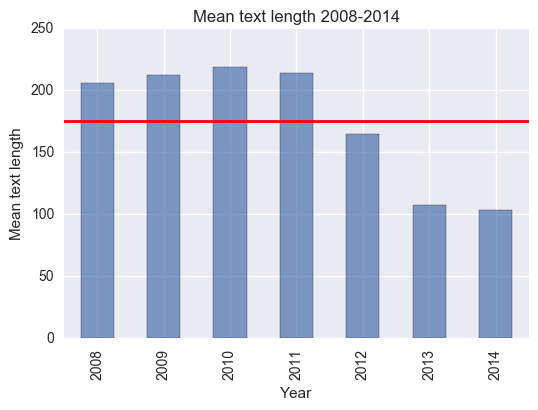

In [108]:
b = di.groupby(di.unixReviewTime.dt.year) # average length of reviews per year.
b['wordLength'].mean().plot(kind = 'bar', alpha =0.7)
plt.ylabel('Mean text length')
plt.xlabel('Year')
plt.axhline(y= 175.0, linewidth=2, color='r')
plt.title('Mean text length 2008-2014')

In [102]:
c = df.groupby(df.unixReviewTime.dt.year) # average length of reviews per year.
d = c['wordLength'].mean()
d.mean()

184.0619258144336

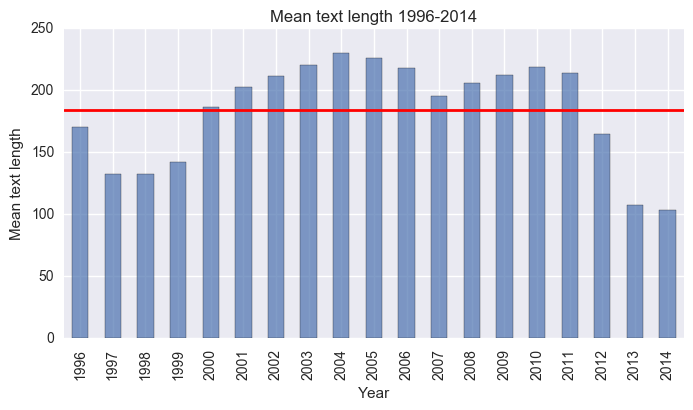

In [103]:
c = df.groupby(df.unixReviewTime.dt.year) # average length of reviews per year.
d = c['wordLength'].mean().plot(kind = 'bar', alpha =0.7, figsize = [8, 4])
plt.ylabel('Mean text length')
plt.xlabel('Year')
plt.axhline(y= 184.0, linewidth=2, color='r')
plt.title('Mean text length 1996-2014')

### Text length as a function of year

In [39]:
dj = dh.drop(dh.columns[0], axis=1)

In [44]:
dj = dj.reset_index()
dj.head(1)

,unixReviewTime,wordLength
0,1996-05-20,273


In [111]:
dj.tail(1)

,unixReviewTime,wordLength
1135223,2007-12-31,408


In [60]:
dk = df.drop(df.columns[0], axis =1)
dk = dk.reset_index()
dk.head(1)

,unixReviewTime,wordLength
0,1996-05-20,273


In [110]:
dk.tail(1)

,unixReviewTime,wordLength
8897273,2014-07-23,327


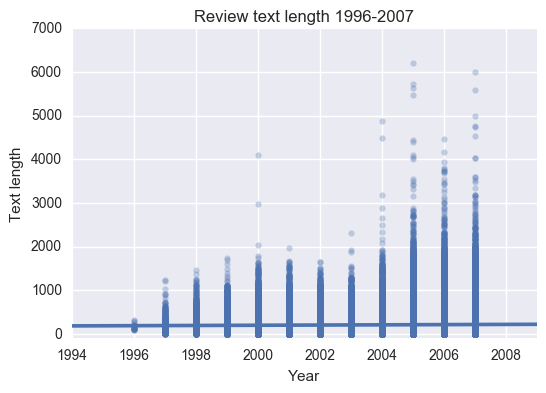

In [113]:
sns.regplot(x = dj.unixReviewTime.dt.year, y = 'wordLength', data =dj, scatter_kws={'alpha':0.3}, fit_reg= True)
plt.xlim([1994, 2009])
plt.ylim([-100, 7000])
plt.xlabel('Year')
plt.ylabel('Text length')
plt.title('Review text length 1996-2007')

The trend line was steady (slightly increasing actually) in 1996-2007.

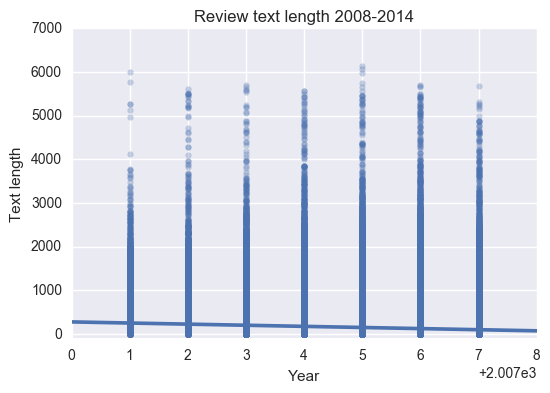

In [115]:
sns.regplot(x = di.unixReviewTime.dt.year, y = 'wordLength', data =di, scatter_kws={'alpha':0.3}, fit_reg= True)
plt.xlim([2007, 2015])
plt.ylim([-100, 7000])
plt.xlabel('Year')
plt.ylabel('Text length')
plt.title('Review text length 2008-2014')

The trend line is decreasing in 2007-2014.

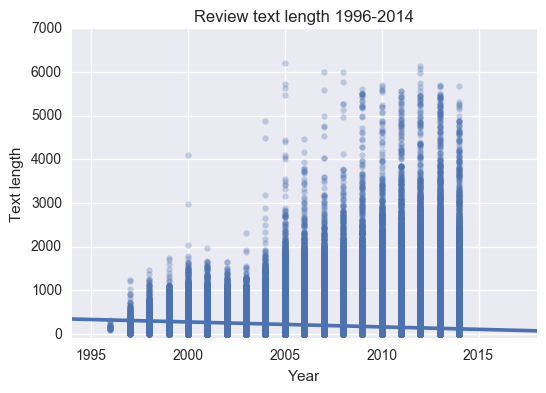

In [116]:
sns.regplot(x = dk.unixReviewTime.dt.year, y = 'wordLength', data =dk, scatter_kws={'alpha':0.3}, fit_reg= True)
plt.ylim([-100, 7000])
plt.xlim([1994, 2018])
plt.xlabel('Year')
plt.ylabel('Text length')
plt.title('Review text length 1996-2014')

The length is decreasing in recent years even though some long reviews have been written. Some outliers are observed in 2004-2010.